## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

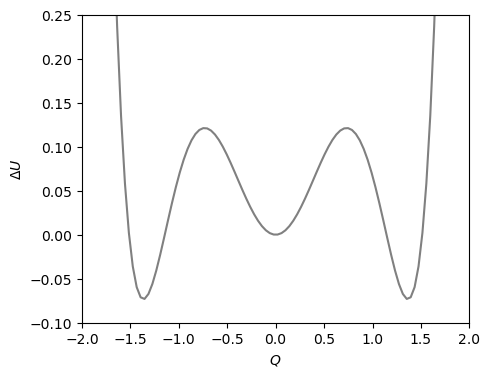

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

Goal: create a figure that shows  angular frequency, $\omega$, versus the initial amplitude of the oscillator, $Q_0$ 

In [ ]:
#Strategizing with Pseudocode:

#Import libraries
#Define parameters/variables
#Solve for dynamics
#Extract Frequency
#Plot frequency vs. Q_0(pm1.7)



In [5]:
#Expanding Pseudocode:

#Import libraries
    #sympy
    #matplotlib.pyplot
    #numpy
#Define parameters/variables
    #U K Q D phi F C (force and curvature) 
    #define U(Q)
    #Q_0 = 0
#Solve for dynamics
    #take derivatives of U
    #F = -dU/dQ
    #C = d^2U/dQ^2
#Extract Frequency 
#Plot frequency vs. Q_0(+/-1.7)


In [35]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#Defining U:
U, K, Q, D, phi, F, C, M = sp.symbols('U K Q D phi F C M')

potential_energy = sp.Eq(1/2 * K * Q ** 2 - 1/4 * D * Q **4 + 1/6 * phi * Q ** 6, U)

p_energy_solution = sp.solve(potential_energy, U)
p_energy_solution
#checked^

#First deriv. of U= -F_Q = motion

force_expression = sp.Eq(-1 * sp.diff(1/2 * K * Q ** 2 - 1/4 * D * Q **4 + 1/6 * phi * Q ** 6, Q), F)
#force_expression
#checked^

#Curvature at Q=0 in 2nd deriv is K

curvature_expression = sp.Eq(sp.diff(sp.diff(1/2 * K * Q ** 2 - 1/4 * D * Q **4 + 1/6 * phi * Q ** 6, Q), Q), C)
curvature_expression
#checked^

Eq(-3.0*D*Q**2 + 1.0*K + 5.0*Q**4*phi, C)

In [23]:
#Extracting Frequency:

#inputting angular_frequency = sp.sqrt(C/M)

angular_frequency = sp.sqrt((K - 3 * D * Q ** 2 + 5 * phi * Q ** 4)/M)
angular_frequency

sqrt((-3*D*Q**2 + K + 5*Q**4*phi)/M)

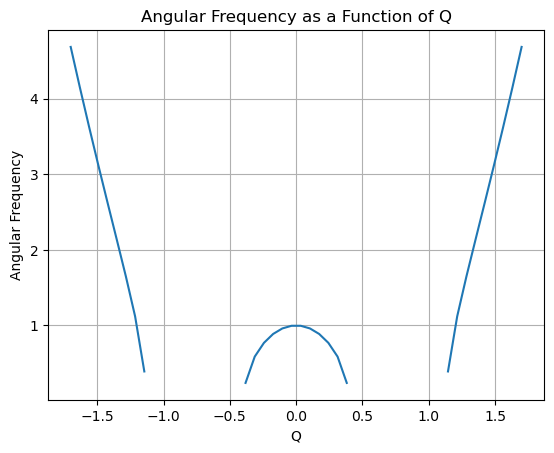

In [76]:
x = np.linspace(-1.7, 1.7, 50)

# K = phi = M = 1; D = 2.4

def angular_frequency(x):
    return np.sqrt(5 * x ** 4 - 7.2 * x ** 2 + 1)
    
frequency_plot = angular_frequency(x)


plt.plot(x, frequency_plot)
plt.xlabel('Q')
plt.ylabel('Angular Frequency')
plt.title('Angular Frequency as a Function of Q')
plt.grid(True)
plt.show()

The plot of angular frequency as a function of Q implies that angular frequency will generally decrease as Q approaches zero from positive and negative directions, with angular frequency stopping briefly on either side of Q = 0.